In [1]:
define sir
    let beta = 0.4
    let gamma = 0.04
    

    let S = 997.0
    let I = 3.0
    let R = 0.0

    let N = S + I + R


    beta/N,  S + I --> 2I
    gamma,   I     --> R
end

In [2]:
observed = loadCSV("data/i_data2.csv")

In [3]:
sir_vals = simulate(sir at time(observed))

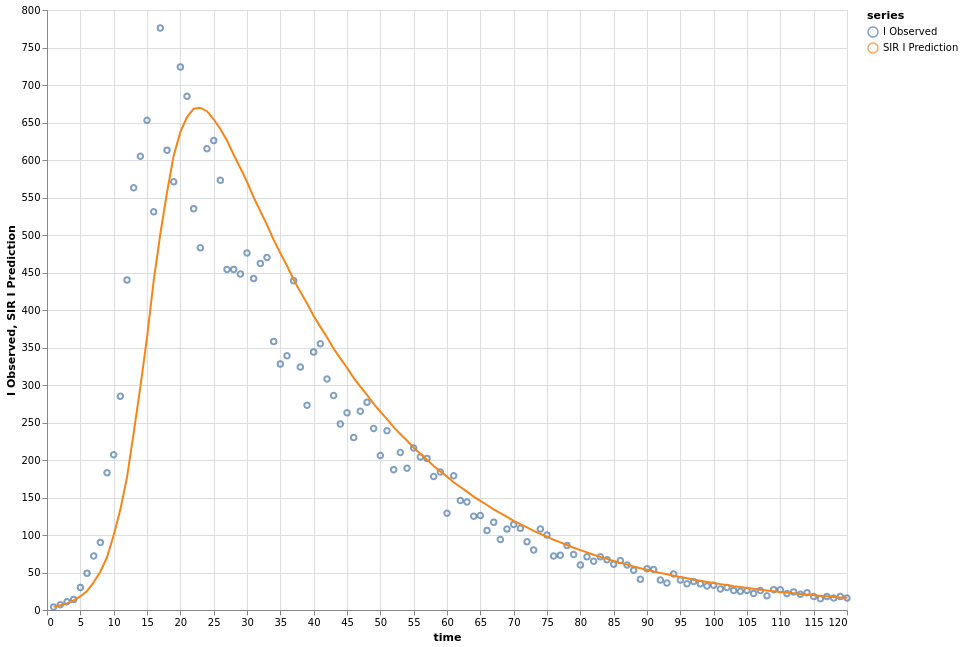

In [4]:
sir_I_series = series(value(sir_vals.I), "SIR I Prediction", {{ style = "Lines"}})
observed_I_series = series(value(observed.I),  "I Observed", {{ style = "points"}})
plot("SIR vs observed", [observed_I_series, sir_I_series], time(observed), "time")

In [5]:
sir_fit = fit(sir, {{time = time(observed), I = value(observed.I) }}, ["beta"])

In [6]:
describeModel(sir)
sir_withFit = withParams(sir, sir_fit.values)
describeModel(sir_withFit)

|Name|State/Param|Data Type|Value|
|---|---|---|---|
|I_init|parameter|Real|3.0|
|R_init|parameter|Real|0.0|
|S_init|parameter|Real|997.0|
|beta|parameter|Real|0.4|
|gamma|parameter|Real|4.0e-2|
|I|state|Real|I_init|
|R|state|Real|R_init|
|S|state|Real|S_init|
|N|state|Real|S + I + R|

|Name|State/Param|Data Type|Value|
|---|---|---|---|
|I_init|parameter|Real|3.0|
|R_init|parameter|Real|0.0|
|S_init|parameter|Real|997.0|
|beta|parameter|Real|0.5155188699774484|
|gamma|parameter|Real|4.0e-2|
|I|state|Real|I_init|
|R|state|Real|R_init|
|S|state|Real|S_init|
|N|state|Real|S + I + R|

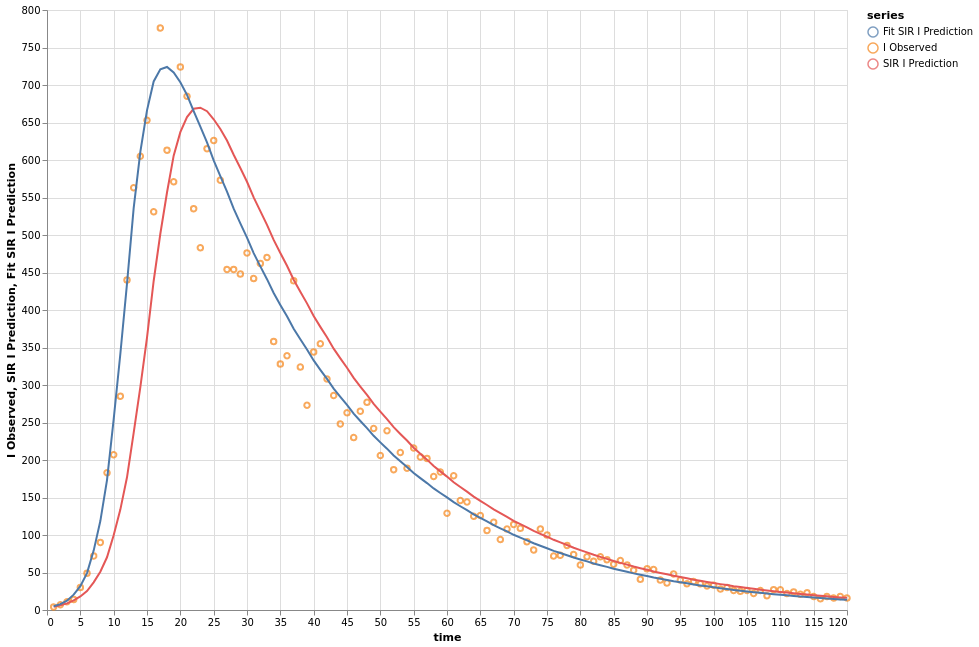

In [7]:
sir_fit_vals = simulate(sir_withFit at time(observed))
sir_fit_series = series(value(sir_fit_vals.I), "Fit SIR I Prediction", {{ style = "Lines" }})
plot("SIR vs observed", [observed_I_series, sir_I_series, sir_fit_series], time(observed), "time")

In [8]:
seird = loadESL("models/seird_hosp.easel")

In [9]:
describeModel(seird)

|Name|State/Param|Data Type|Value|
|---|---|---|---|
|beta|parameter|Real|0.8|
|d|parameter|Real|5.0e-3|
|dh|parameter|Real|5.0e-2|
|di|parameter|Real|1.0e-2|
|gamma|parameter|Real|0.333|
|nu|parameter|Real|0.4|
|pHosp|parameter|Real|0.2|
|sigma|parameter|Real|0.6|
|Dead|state|Real|0.0|
|Exposed|state|Real|0.0|
|Hospitalized|state|Real|0.0|
|Infected|state|Real|1.0|
|Recovered|state|Real|0.0|
|Susceptible|state|Real|997.0|
|population|state|Real|Susceptible + Recovered + Infected + Exposed + Hospitalized|

In [10]:
double_epidemic = 
  join(["ep1_", sir_withFit],
       ["ep2_", seird],
       [["S", "Susceptible"]])
describeModel(double_epidemic)


|Name|State/Param|Data Type|Value|
|---|---|---|---|
|ep1_I_init|parameter|Real|3.0|
|ep1_R_init|parameter|Real|0.0|
|ep1_S_init|parameter|Real|997.0|
|ep1_beta|parameter|Real|0.5155188699774484|
|ep1_gamma|parameter|Real|4.0e-2|
|ep2_beta|parameter|Real|0.8|
|ep2_d|parameter|Real|5.0e-3|
|ep2_dh|parameter|Real|5.0e-2|
|ep2_di|parameter|Real|1.0e-2|
|ep2_gamma|parameter|Real|0.333|
|ep2_nu|parameter|Real|0.4|
|ep2_pHosp|parameter|Real|0.2|
|ep2_sigma|parameter|Real|0.6|
|S|state|Real|ep1_S_init|
|ep1_I|state|Real|ep1_I_init|
|ep1_R|state|Real|ep1_R_init|
|ep2_Dead|state|Real|0.0|
|ep2_Exposed|state|Real|0.0|
|ep2_Hospitalized|state|Real|0.0|
|ep2_Infected|state|Real|1.0|
|ep2_Recovered|state|Real|0.0|
|ep1_N|state|Real|ep1_I + S + ep1_R|
|ep2_population|state|Real|ep2_Recovered + ep2_Infected + ep2_Exposed + S + ep2_Hospitalized|

In [11]:
de_fit = fit(double_epidemic, {{time = time(observed), ep1_I = value(observed.I) }}, ["ep2_beta"])

In [12]:
de_withFit = withParams(double_epidemic, de_fit.values)
describeModel(de_withFit)

|Name|State/Param|Data Type|Value|
|---|---|---|---|
|ep1_I_init|parameter|Real|3.0|
|ep1_R_init|parameter|Real|0.0|
|ep1_S_init|parameter|Real|997.0|
|ep1_beta|parameter|Real|0.5155188699774484|
|ep1_gamma|parameter|Real|4.0e-2|
|ep2_beta|parameter|Real|2.1013797135428915|
|ep2_d|parameter|Real|5.0e-3|
|ep2_dh|parameter|Real|5.0e-2|
|ep2_di|parameter|Real|1.0e-2|
|ep2_gamma|parameter|Real|0.333|
|ep2_nu|parameter|Real|0.4|
|ep2_pHosp|parameter|Real|0.2|
|ep2_sigma|parameter|Real|0.6|
|S|state|Real|ep1_S_init|
|ep1_I|state|Real|ep1_I_init|
|ep1_R|state|Real|ep1_R_init|
|ep2_Dead|state|Real|0.0|
|ep2_Exposed|state|Real|0.0|
|ep2_Hospitalized|state|Real|0.0|
|ep2_Infected|state|Real|1.0|
|ep2_Recovered|state|Real|0.0|
|ep1_N|state|Real|ep1_I + S + ep1_R|
|ep2_population|state|Real|ep2_Recovered + ep2_Infected + ep2_Exposed + S + ep2_Hospitalized|

In [13]:
de_sim = simulate(double_epidemic.ep1_I at time(observed))
de_fit_sim = simulate(de_withFit.ep1_I at time(observed))

In [14]:
de_series = series(value(de_sim), "Double Epidemic I Prediction", {{style = "lines"}})
de_fit_series = series(value(de_fit_sim), "Double Epidemic I Prediction(Fit)", {{style = "lines"}})

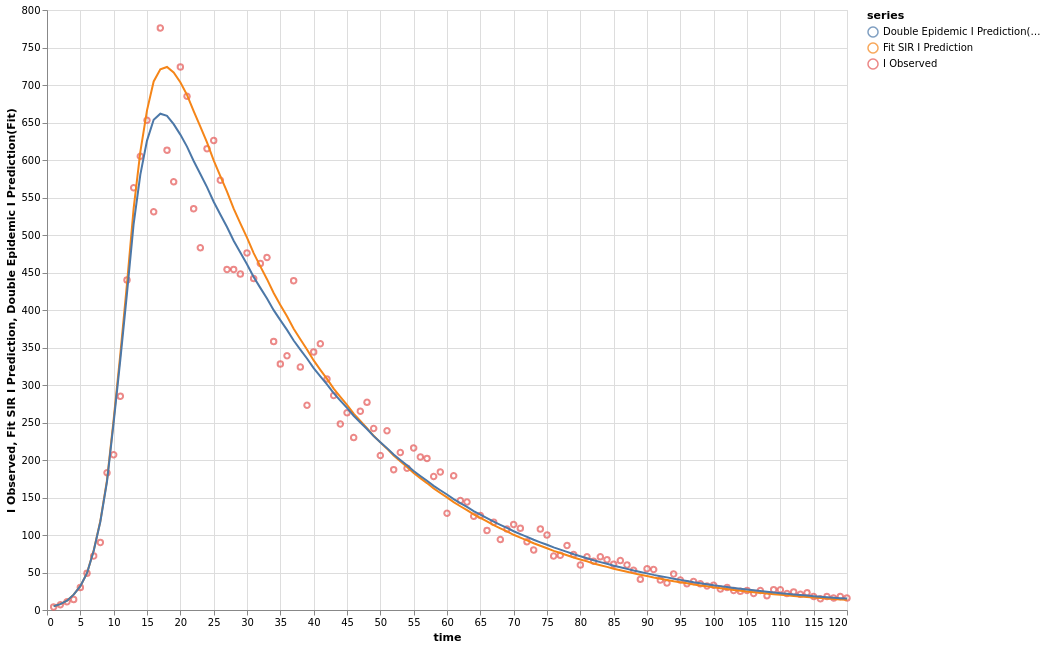

In [15]:
plot("Double Epidemic Predictions", [observed_I_series, sir_fit_series, de_fit_series], time(observed), "time")